In [6]:
### Yiğit Şevki KAPLAN
### 22243810049
### 01.10.2025

In [7]:
import pandas as pd
# 'pandas' for data manipulation, 'pd' for calling

In [8]:
advertising = pd.read_csv("Company_data.csv")

In [9]:
advertising.head()
# ilk 5(default) data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
advertising.head(10)
# parantezin içindeki sayı kadar

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [11]:
advertising.shape
# data boyutu için (200 satır, 4 sütun)

(200, 4)

In [12]:
advertising.info()
# verinin tipi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
print(advertising.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [14]:
# descriptive statistics

In [15]:
import seaborn as sns
# grafikler için

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


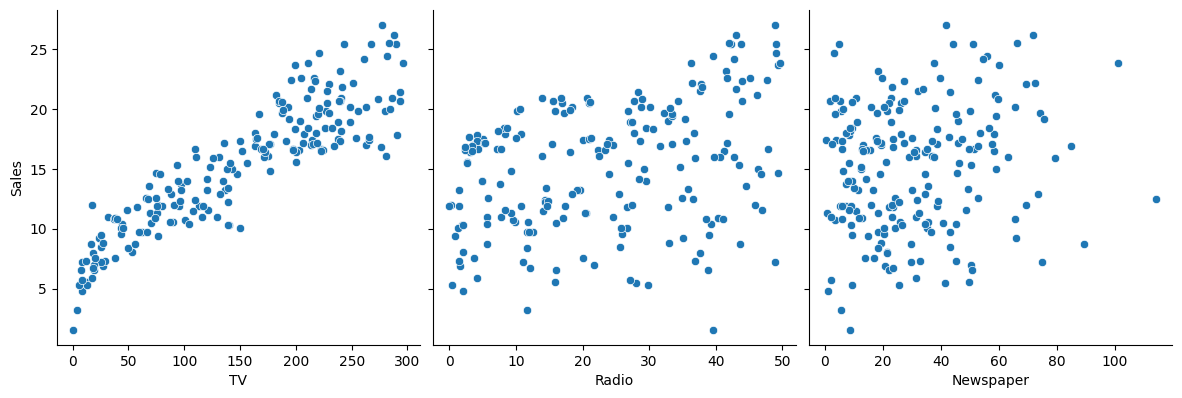

In [16]:
sns.pairplot(advertising, x_vars = ["TV", "Radio", "Newspaper"],
             y_vars = ['Sales'], size = 4)

<Axes: >

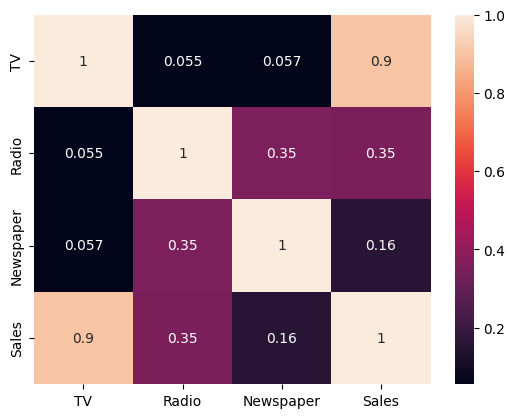

In [17]:
sns.heatmap(advertising.corr(),annot = True)
# corr = correlation

<Axes: >

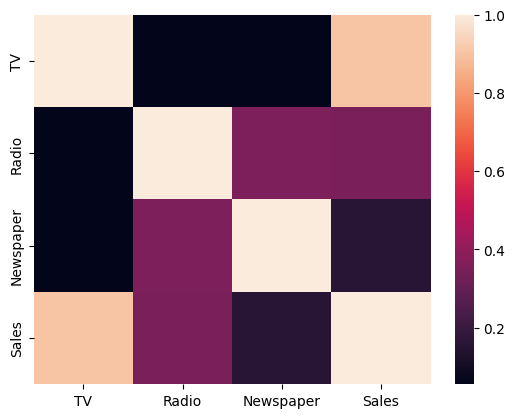

In [18]:
sns.heatmap(advertising.corr())
# annot = True olmadan sayılar yazılmıyor.

In [19]:
X = advertising['TV']
Y = advertising['Sales']

In [20]:
# Train & Test olarak iki model yapıcaz. Train de eğitim,
#                                  Test model işliyor mu?
# Overfitting, Train yapılan model Test de iyi performans
#                                          sergilemez ise

In [21]:
from sklearn.model_selection import train_test_split
# 'sklearn.model_selectio' a git 'train_test_split' çağır

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    X,Y, train_size = 0.7, random_state = 53)
# rastgele sayıları seçerken, random state ile
#          belirli bir rastgelelik ile
#          seçimlerimizi yapıyoruz.

In [23]:
len(x_train)
# ne kadar? var

140

In [24]:
len(x_test)
# "train" den kalanlar "test" e verildi.

60

In [25]:
import statsmodels.api as sm
# istatiksel model buradan gelicek (regresyon model)

In [26]:
x_train_sm = sm.add_constant(x_train)
# constant eklendi (BETA 0)

In [27]:
lr = sm.OLS(y_train, x_train_sm).fit()
# ordered list square, küçükten büyüğe (lr regresyon
#                             denklemimizi içeriyor)

lr = sm.OLS(y_train, x_train_sm).fit() | araştır

In [28]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     563.2
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.47e-50
Time:                        03:24:37   Log-Likelihood:                -313.96
No. Observations:                 140   AIC:                             631.9
Df Residuals:                     138   BIC:                             637.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1557      0.405     17.682      0.0

In [29]:
# TV deki bir birim atrış, sales 0.055 artırıyor.
#             TV 0 olsaydı Sales '7.1557' olacak.
# p < (alpha) olduğundan | Reject H0 yada Coef.
#           interval 0 ı kapsamıyorsa | Reject H0
# F testi 0.05 den küçükse anlamlı
# R'2 1 e yakın

# Varsayımlar
# Durbin-Watson, 2 ye yakın olmalı (2 ile 4 arası)
#                | Error termler arası correlation
#                           yok, bir bağlantı yok.
# Jarque-Bera (JB) ve Prob(Omnibus) aynı, Null
#             Hypothesis red edilmeyecek; Prob(JB)
#           ve Prob(Omnibus) 0.05 den büyük olmalı
#           | error termin normal dağılımdan gelip
#                          gelmediğini gösteriyor.

In [ ]:
### Yiğit Şevki KAPLAN
### 22243810049
### 08.10.2025

In [30]:
import matplotlib.pyplot as plt
# normal grafik (istatiksel değil)

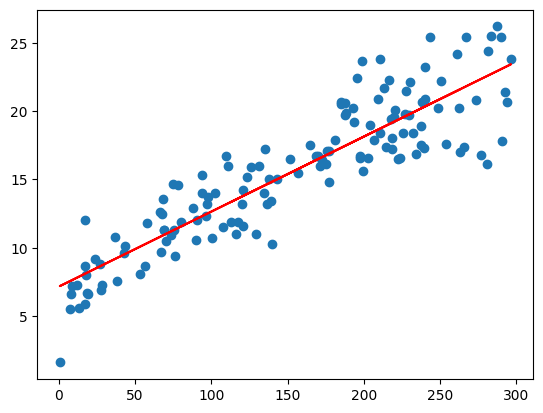

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 7.1557 + 0.0549*x_train, 'r')

In [32]:
y_train_pred = lr.predict(x_train_sm)

In [33]:
res = y_train-y_train_pred
# elimizde olan y değerlerinden, tahmin ettiğimiz (regresion denklemi ile) değerleri çıkartıp error buluyoruz.

/tmp/ipython-input-2433857350.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=10)


Text(0.5, 0, 'Residulas')

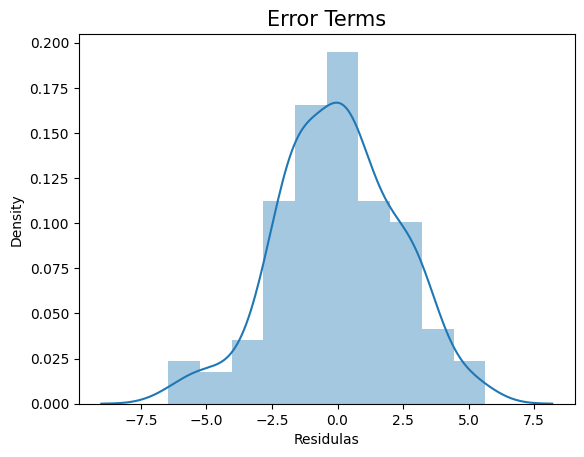

In [34]:
sns.distplot(res, bins=10)
# sns = seaborn (istatiksel grafikler için)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Residulas', fontsize = 10)

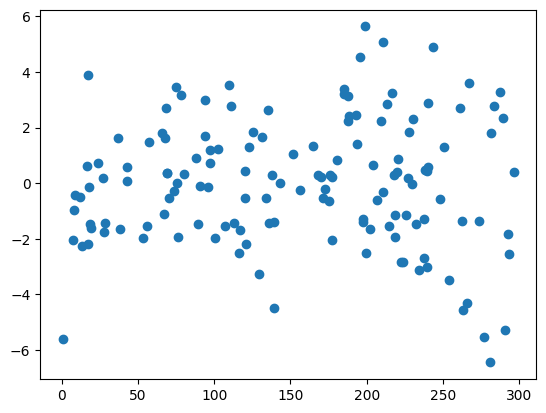

In [35]:
plt.scatter(x_train, res)

In [36]:
# x ile error arasında bir bağlantı yok. (zaten
#              hipotez testi ile kontrol ettik)

In [37]:
x_test_sm = sm.add_constant(x_test)
y_train_pred = lr.predict(x_test_sm)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test, y_train_pred)

0.819497538906218

In [40]:
# dramatik bir düşüş yok. (train verimizde 0.803 çıkmıştı, 0.3 veya 0.2 gibi değerler kabul edilemez.)